# We are going to predict the price of used car

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Get raw_data

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Get useful datas and drop unnecessary datas. For example: We have 312 unique Models, which means 312 dummies

In [4]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values. As we can see, count numbers are different, which means some values are missing

In [5]:
data.isnull().sum()
#It shows us all missing values, we got price and EngineV has different counts. Let's see exactly how many values are missing

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
#Rule of thumb: if you're removing <5% of the observations, you are free to just remove all that have missing values (MV)
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs (Probability Density Function)

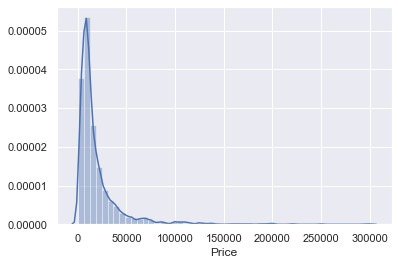

In [8]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


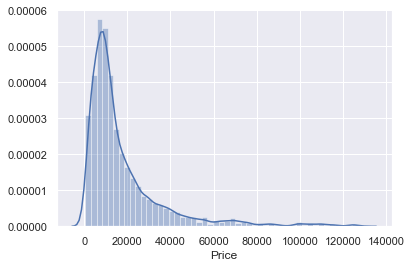

In [10]:
#Let's see our PDF without outliers
sns.distplot(data_1['Price'])

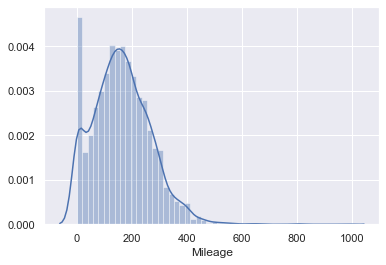

In [11]:
#We do same things to our Mileage. First let's check out how PDF looks like.
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

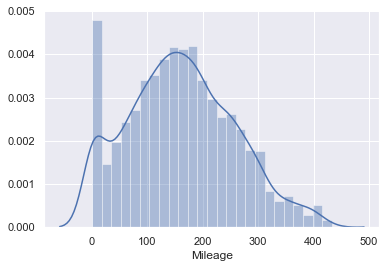

In [13]:
sns.distplot(data_2['Mileage'])

In [14]:
#When we manually see the EngineV values. Some of them are 90+, and little bit google search we can see EngineV must be low than 6.5.
data_3 = data_2[data_2['EngineV']<6.5]

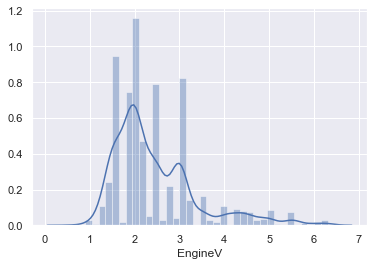

In [15]:
sns.distplot(data_3['EngineV'])

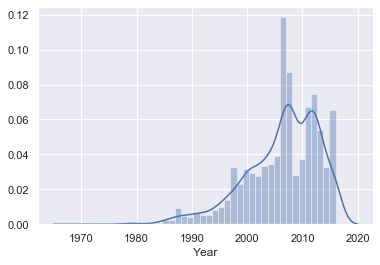

In [16]:
#Let's check out Year PDF
sns.distplot(data_no_mv['Year'])

In [17]:
#Most of the cars are new, but there seem to be few vintage cars this time.
#We'll keep all observations that are higher 
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

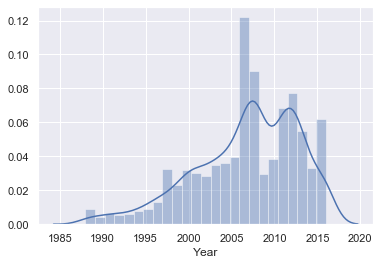

In [18]:
sns.distplot(data_4['Year'])

In [19]:
#Now we're ready to go, because we just cleaned our data. Let's save it to data_cleaned variable and reset our index.
data_cleaned = data_4.reset_index(drop = True)

In [20]:
#Let's check out our cleaned data once more
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Check the OLS assumptions (Ordinary Least Squares)

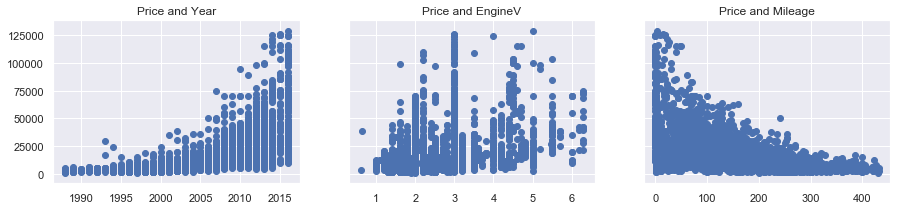

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title("Price and Mileage")

plt.show()

In [22]:
#As we can see, those are not linear. 
#We couldn't run linear regression -> that means, we should transform one or more variables
#Log transformation is a common way to deal with this issue, because this is really useful when we facing exponential relationships

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


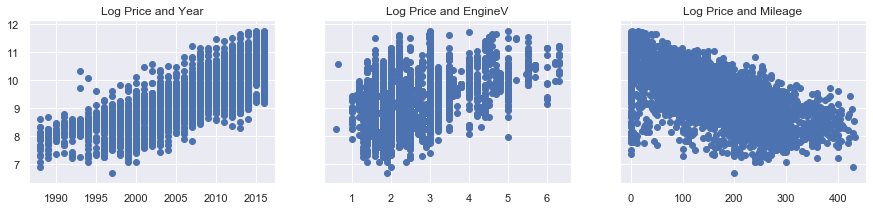

In [23]:
#Let's plot them again and see the difference between log and not log
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title("Log Price and Mileage")

plt.show()

In [24]:
#As we can see, it're much better to use linear regression.
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Check Multicollinearity

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [26]:
#It is logical that year and milage are going to be correlated.
#Sklearn deosn't have a dedicated method to check this assumption
#We will check it with Statsmodels, and best way to check is through VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [27]:
vif

,VIF,Features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [28]:
# If VIF=1; means no multicollinearity
# If 1<VIF<5; perfectly okay
# If VIF>10; unacceptable
# In our case, Year is too correlated with the other variables, therefore we need to remove year
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

### Create dummy variables

In [29]:
#Pandas package has already get_dummies method and it spots all categorical variables and creates dummies automatically
#If we have N categories for a feature, we have to create N-1 dummies !!!
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [30]:
# Rearrange 
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
#Let's change log_price column to the first
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model ! 

In [33]:
#Declare the inputs and the targets
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [34]:
#Scale the data
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
input_scaled = scaler.transform(inputs)

#### Train & Test Split

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size =0.2, random_state=365)

#### Creating Regression

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train) #It's log-linear regression because we used log_price xD

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_hat = reg.predict(x_train)

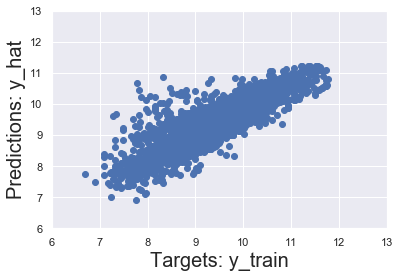

In [39]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets: y_train', size=20)
plt.ylabel('Predictions: y_hat', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

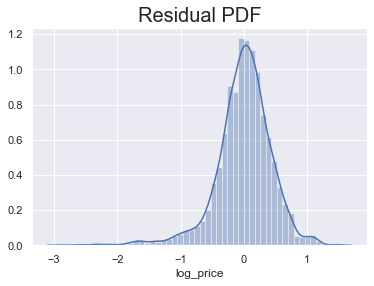

In [40]:
# We should draw a line 45 degree, and the closer our scatter plots to this line, the better the model
# Also we need to check residual.
# Residual = Differences between the targets and predictions

sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size=20)

In [41]:
# As we can see, it's normally distributed and mean seems to be zero. 
# And one issue could be there is much longer tails on negative side.
# There are certain observations for which (y_train - y_hat) is much lower than mean
# (a much higher price is predicted than is observed)

#Let's check R-Squared
reg.score(x_train, y_train)

0.7415645182486198

### Find weights and bias

In [42]:
reg.intercept_

9.413280072375791

In [43]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [44]:
#Let's create summary tables
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


#### 1. Positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively
In our data: The bigger the EngineV, the higher the price.
#### 2. Negative weight shows that as a feature increases in value, so do the log_price and 'Price' decrease
In our data: Mileage (The more car is being driven, the lower the price)

In [45]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

There is 8 brands, but in our reg_summary, audi is dropped because all other dummies are zero, but Audi is one. So Audi is benchmark
#### Dummy variables: A positive weight shows that the respective category (Brands) is more expensive than the benchmark (Audi)
#### Dummy variables: A negative weight shows that the respective category (Brands) is more cheaper than the benchmark (Audi)
In our data: Brand_BMW (positive) is expensive than Audi, but Brand_mitsubishi (negative)is cheaper than Audi

# Testing

In [46]:
y_hat_test = reg.predict(x_test)

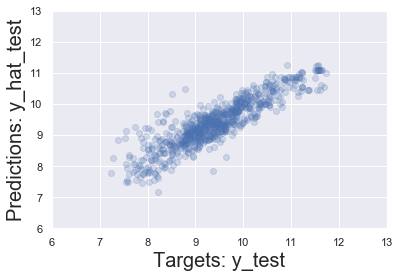

In [48]:
plt.scatter(y_test, y_hat_test, alpha=0.2) #alpha is the proportional opacity of the points
plt.xlabel('Targets: y_test', size=20)
plt.ylabel('Predictions: y_hat_test', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [50]:
#The more saturated the color, the higher the concentration

#Let's create dataframe performance variable to see predictions of log prices
df_pf = pd.DataFrame(y_hat_test, columns = ['Predictions'])
df_pf.head()

,Predictions
0,9.273356
1,8.992378
2,8.824541
3,8.936821
4,9.333425


In [52]:
#np.exp returns the exponentional of x (The Euler number 'e' to the power of x)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [54]:
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Predictions,Targets
0,10650.438709,NaN
1,8041.555683,7900.0
2,6799.069945,NaN
3,7606.977689,NaN
4,11309.799759,NaN


In [56]:
#We have lot of missing values because y_test has indexes. And Pandas tried to match indicies
y_test.head()

1192    7.740664
2752    9.487972
3752    8.999619
3256    8.764053
892     9.121509
Name: log_price, dtype: float64

In [57]:
#We need to forget this indexing
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    9.487972
2    8.999619
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [59]:
#Let's do it again, it must be no more missing values in targets.
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Predictions,Targets
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0


In [61]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']

In [62]:
df_pf['Difference %'] = np.absolute(df_pf['Residual']/df_pf['Targets'] * 100)
df_pf.head()

,Predictions,Targets,Residual,Difference %
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369


In [63]:
df_pf.describe()

,Predictions,Targets,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465


In [66]:
# Minimum Difference is 0.05% which means we clearly spotted it but maximum difference is 507%
# But if we see between min and max we see good percentages 
# Which means, for most of our predictions we got relativily close 
# Closer look:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x:'%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Predictions,Targets,Residual,Difference %
264,11493.47,11500.00,6.53,0.06
742,16985.25,16999.00,13.75,0.08
60,12486.36,12500.00,13.64,0.11
127,23257.55,23200.00,-57.55,0.25
308,8876.92,8900.00,23.08,0.26
242,7478.35,7500.00,21.65,0.29
698,30600.22,30500.00,-100.22,0.33
379,17733.15,17800.00,66.85,0.38
114,27429.73,27300.00,-129.73,0.48
317,11560.12,11500.00,-60.12,0.52


In [ ]:
# At the bottom, we see biggest differences
# We see that observed prices (Targets) are extremely low when we get biggest differences
# It may be the model of the car, which we removed, or it may be the car was damaged in some way